In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
df = pd.read_csv("C:/Users/trish/OneDrive/Desktop/Binary Breast Cancer Classification Project/data.csv")

In [12]:
print(df.describe().T)

                         count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               

In [13]:
print(df.isnull().sum())
# df = df.dropna()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [14]:
#Rename Dataset to Label to make it easy to understand
df = df.rename(columns={'diagnosis':'Label'})
print(df.dtypes)

id                           int64
Label                       object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [15]:
df.drop(labels=["id"], axis=1, inplace=True)

In [16]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

<Axes: xlabel='Label', ylabel='count'>

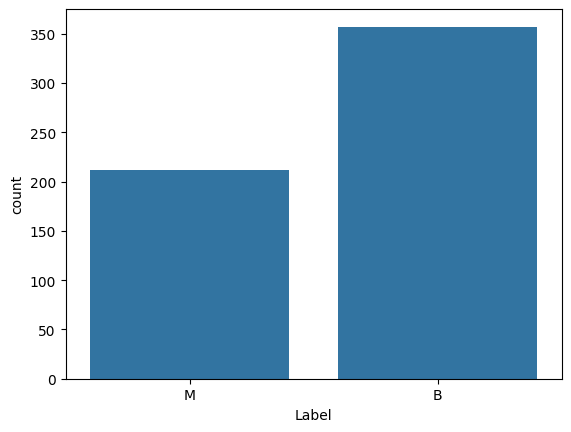

In [17]:
#Understand the data
sns.countplot(data=df, x="Label") #M - malignant   B - benign

In [19]:
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

# Define features (X) and target (y)
X = df.drop("Label", axis=1)
y = df["Label"]

# Scale features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
#Split data into train and test to verify accuracy after fitting the model.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("Shape of training data is: ", X_train.shape)
print("Shape of testing data is: ", X_test.shape)

Shape of training data is:  (426, 30)
Shape of testing data is:  (143, 30)


In [21]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [45]:
model = Sequential()
model.add(Dense(32, input_dim=30, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 32)                992       
                                                                 
 dropout_13 (Dropout)        (None, 32)                0         
                                                                 
 dense_26 (Dense)            (None, 1)                 33        
                                                                 
 activation_11 (Activation)  (None, 1)                 0         
                                                                 
Total params: 1025 (4.00 KB)
Trainable params: 1025 (4.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [48]:
#Fit with no early stopping or other callbacks
history = model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=64,
                    validation_data=(X_test, y_test))


Epoch 1/100
7/7 [==============================] - 0s 55ms/step - loss: 0.2596 - accuracy: 0.9061 - val_loss: 0.1584 - val_accuracy: 0.9441
Epoch 2/100
7/7 [==============================] - 0s 35ms/step - loss: 0.2327 - accuracy: 0.9108 - val_loss: 0.1573 - val_accuracy: 0.9371
Epoch 3/100
7/7 [==============================] - 0s 24ms/step - loss: 0.2644 - accuracy: 0.9178 - val_loss: 0.1535 - val_accuracy: 0.9510
Epoch 4/100
7/7 [==============================] - 0s 39ms/step - loss: 0.2462 - accuracy: 0.9085 - val_loss: 0.1534 - val_accuracy: 0.9510
Epoch 5/100
7/7 [==============================] - 0s 39ms/step - loss: 0.2609 - accuracy: 0.9108 - val_loss: 0.1519 - val_accuracy: 0.9510
Epoch 6/100
7/7 [==============================] - 0s 37ms/step - loss: 0.2689 - accuracy: 0.8967 - val_loss: 0.1537 - val_accuracy: 0.9371
Epoch 7/100
7/7 [==============================] - 0s 25ms/step - loss: 0.2627 - accuracy: 0.9131 - val_loss: 0.1557 - val_accuracy: 0.9371
Epoch 8/100
7/7 [===

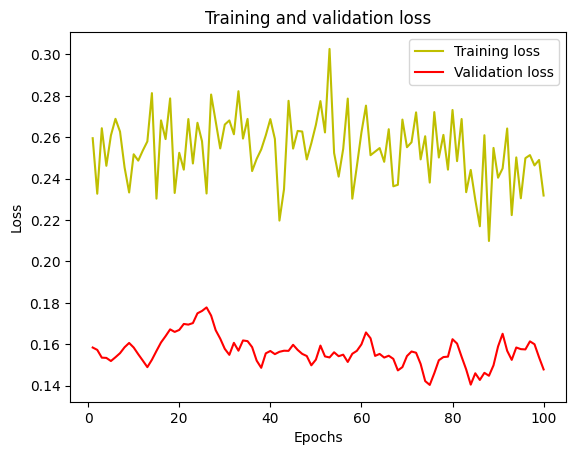

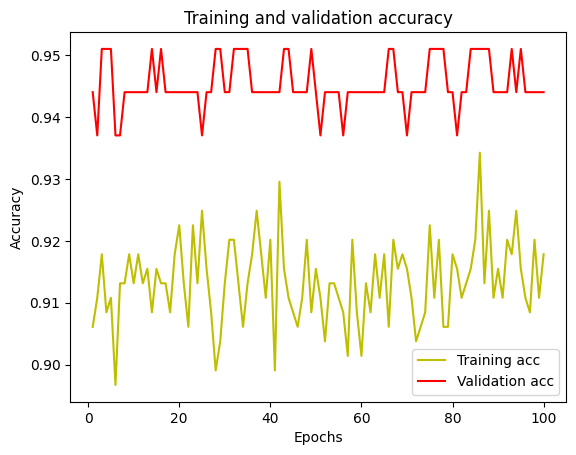

In [49]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

5/5 [==============================] - 0s 3ms/step


<Axes: >

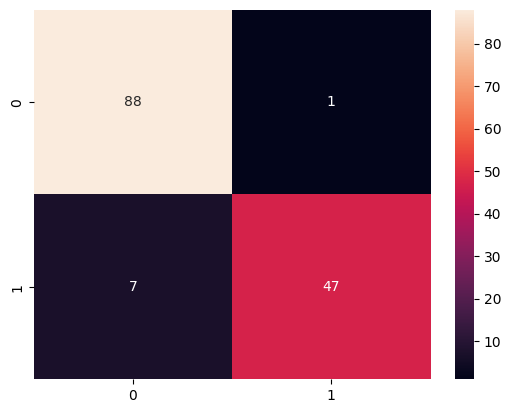

In [50]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)